In [1]:
# read profile data and convert to csv

from pathlib import Path
import os
from utils import prof_to_csv

profile_folder = "profiles"
profile_names = os.listdir(profile_folder)
raw_profiles_path = [os.path.join(profile_folder, name) for name in profile_names]
csv_profiles_path = [os.path.join("profiles_csv", f"{Path(name).stem}.csv") for name in profile_names]

for raw_path, csv_path in zip(raw_profiles_path, csv_profiles_path):
    profile = prof_to_csv(raw_path)
    with open(csv_path, "w") as f:
        f.write(profile)

In [2]:
len(profile_names)

40

In [3]:
# read sample profile

import pandas as pd
profile = pd.read_csv(os.path.join("profiles_csv", f"{Path(profile_names[0]).stem}.csv"))
profile.sort_values(by='tottime', ascending=False)\
    .head(10)

,ncalls,tottime,percall,cumtime,percall.1,filename:lineno(function)
88,350644,48.041,0.0,146.419,0.0,load_from_msp.py:58(parse_msp_file)
89,40044689,16.822,0.0,24.056,0.0,load_from_msp.py:109(get_peak_values)
92,40044689,11.377,0.0,34.316,0.0,load_from_msp.py:124(get_peak_comment)
36,60959981,10.936,0.0,15.414,0.0,re.py:289(_compile)
91,40044689,10.333,0.0,12.808,0.0,load_from_msp.py:117(get_peak_tuples)
83,13943528,8.809,0.0,24.544,0.0,PickyDict.py:152(_harmonize_key)
35,40044689,8.229,0.0,22.939,0.0,re.py:233(findall)
90,40044689,7.468,0.0,10.945,0.0,load_from_msp.py:120(<lambda>)
12,83575260,7.010,0.0,7.010,0.0,{method 'split' of 'str' objects}
18,62362690,4.621,0.0,4.738,0.0,{built-in method builtins.isinstance}


In [4]:
from utils import Profile

profiles = [Profile(path) for path in csv_profiles_path]
profiles

[NIST_EI_MS_.msp_CRITICAL_False,
 GNPS-LIBRARY_.msp_WARNING_False,
 GNPS-LIBRARY_.msp_WARNING_True,
 NIST_EI_MS_.mgf_CRITICAL_False,
 NIST_EI_MS_.mgf_WARNING_False,
 GNPS-LIBRARY_.mgf_INFO_False,
 GNPS-LIBRARY_.msp_DEBUG_True,
 GNPS-LIBRARY_.mgf_CRITICAL_True,
 GNPS-LIBRARY_.mgf_ERROR_True,
 NIST_EI_MS_.mgf_INFO_True,
 NIST_EI_MS_.mgf_INFO_False,
 NIST_EI_MS_.msp_DEBUG_True,
 GNPS-LIBRARY_.mgf_INFO_True,
 NIST_EI_MS_.mgf_ERROR_True,
 NIST_EI_MS_.msp_CRITICAL_True,
 GNPS-LIBRARY_.msp_ERROR_False,
 GNPS-LIBRARY_.mgf_ERROR_False,
 GNPS-LIBRARY_.mgf_CRITICAL_False,
 GNPS-LIBRARY_.msp_CRITICAL_False,
 NIST_EI_MS_.msp_WARNING_True,
 NIST_EI_MS_.msp_ERROR_False,
 NIST_EI_MS_.mgf_ERROR_False,
 GNPS-LIBRARY_.msp_ERROR_True,
 GNPS-LIBRARY_.msp_INFO_False,
 GNPS-LIBRARY_.mgf_DEBUG_True,
 NIST_EI_MS_.msp_ERROR_True,
 NIST_EI_MS_.mgf_WARNING_True,
 NIST_EI_MS_.msp_INFO_False,
 NIST_EI_MS_.mgf_DEBUG_True,
 GNPS-LIBRARY_.msp_DEBUG_False,
 GNPS-LIBRARY_.mgf_DEBUG_False,
 GNPS-LIBRARY_.mgf_WARNING_Fals

In [5]:
from collections import defaultdict

data = defaultdict(list, {key: [] for key in ("library", "format", "loglevel", "harmonization", "time")})
for p in profiles:
    data["library"].append(p.library)
    data["format"].append(p.fileformat)
    data["loglevel"].append(p.loglevel)
    data["harmonization"].append(p.harmonization)
    data["time"].append(p.time)

profiles_summary = pd.DataFrame(data)

In [6]:
profiles_summary

,library,format,loglevel,harmonization,time
0,NIST,msp,CRITICAL,False,181.196
1,GNPS,msp,WARNING,False,20.211
2,GNPS,msp,WARNING,True,23.244
3,NIST,mgf,CRITICAL,False,120.922
4,NIST,mgf,WARNING,False,132.162
5,GNPS,mgf,INFO,False,11.613
6,GNPS,msp,DEBUG,True,23.476
7,GNPS,mgf,CRITICAL,True,11.197
8,GNPS,mgf,ERROR,True,11.196
9,NIST,mgf,INFO,True,134.517


[Text(0.5, 1.0, 'NIST-library reading time'), Text(0, 0.5, 'Time (seconds)')]

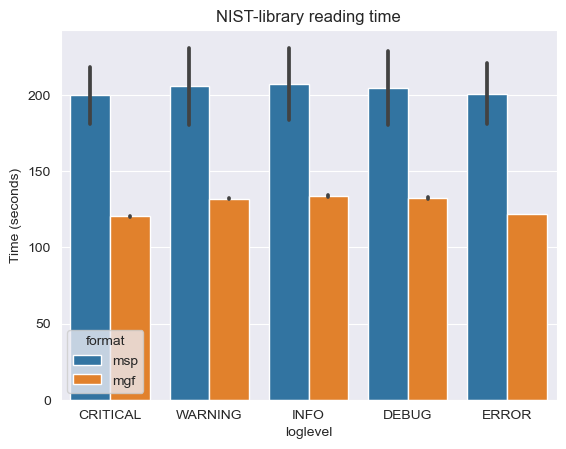

In [7]:
# compare execution time without taking harmonization into account
import seaborn as sns

sns.barplot(data=profiles_summary.loc[profiles_summary["library"] == "NIST"],
            x="loglevel",
            y="time",
            hue="format")\
    .set(title="NIST-library reading time", ylabel="Time (seconds)")

[Text(0.5, 1.0, 'GNPS-library reading time'), Text(0, 0.5, 'Time (seconds)')]

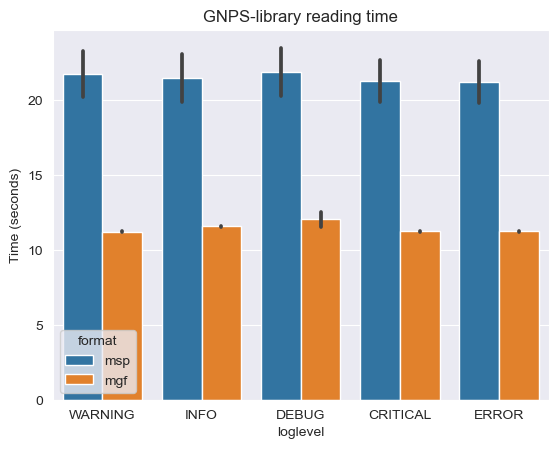

In [8]:
sns.barplot(data=profiles_summary.loc[profiles_summary["library"] == "GNPS"],
            x="loglevel",
            y="time",
            hue="format")\
    .set(title="GNPS-library reading time", ylabel="Time (seconds)")

In [9]:
profiles_grouped = profiles_summary.groupby(by=["library", "harmonization", "format"])\
    .mean()\
    .reset_index()\
    .astype({"library": str, "harmonization": bool, "format": str})
profiles_grouped

/var/folders/v8/_lm9wfvd1xxdt9lqt6754kym0000gn/T/ipykernel_23610/2406235927.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profiles_grouped = profiles_summary.groupby(by=["library", "harmonization", "format"])\


,library,harmonization,format,time
0,GNPS,False,mgf,11.3784
1,GNPS,False,msp,19.9816
2,GNPS,True,mgf,11.5288
3,GNPS,True,msp,22.9932
4,NIST,False,mgf,128.3368
5,NIST,False,msp,181.3140
6,NIST,True,mgf,127.8700
7,NIST,True,msp,226.1140


[Text(0.5, 1.0, 'Comparing data formats with and without harmonization (NIST data)'),
 Text(0, 0.5, 'Time (seconds)')]

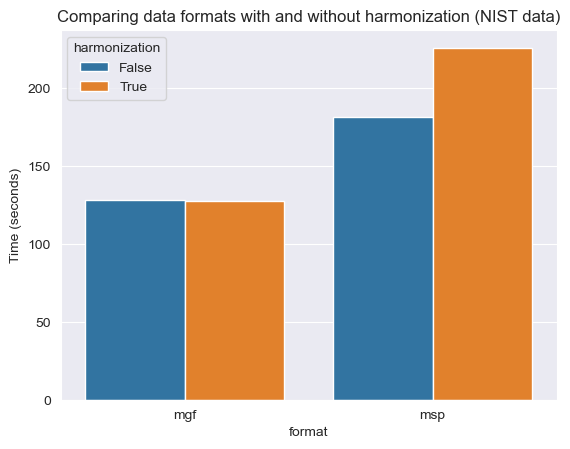

In [10]:
sns.barplot(data=profiles_grouped.loc[profiles_grouped["library"] == "NIST"],
            x="format",
            y="time",
            hue="harmonization")\
   .set(title="Comparing data formats with and without harmonization (NIST data)", ylabel="Time (seconds)")

[Text(0.5, 1.0, 'Comparing data formats with and without harmonization (GNPS data)'),
 Text(0, 0.5, 'Time (seconds)')]

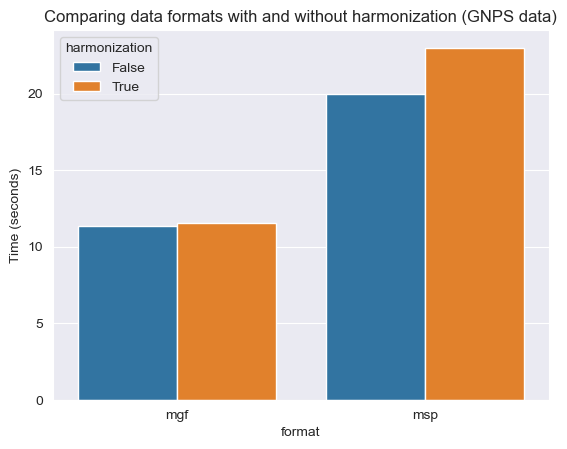

In [11]:
sns.barplot(data=profiles_grouped.loc[profiles_grouped["library"] == "GNPS"],
            x="format",
            y="time",
            hue="harmonization")\
   .set(title="Comparing data formats with and without harmonization (GNPS data)", ylabel="Time (seconds)")


In [17]:
# investigate steps during metadata harmonization for msp files
harmonized_profiles = [p for p in profiles if p.harmonization and p.fileformat == "msp"]
len(harmonized_profiles)

10